___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*
    
- Drop unnecessary columns
    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Demand Prediction and Calculate Scores

- Inverse Transform
- Plot Prediction


## Improt Libraries and Indest Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df1 = pd.read_csv('store_sharing.csv')
               

In [3]:
df=df1.copy()

In [4]:
df.timestamp=pd.to_datetime(df.timestamp)

In [5]:
df=df.set_index("timestamp")

In [6]:
df["month"]=pd.DatetimeIndex(df.index).month
df["day"]=pd.DatetimeIndex(df.index).weekday
df["hour"]=pd.DatetimeIndex(df.index).hour
df["year"]=pd.DatetimeIndex(df.index).year

In [7]:
df[df.day==1].head(24)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour,year
timestamp,,,,,,,,,,,,,
2015-01-06 00:00:00,91,8.000,6.500,76.000,8.000,4.000,0.000,0.000,3.000,1,1,0,2015
2015-01-06 01:00:00,73,8.000,6.500,76.000,8.000,4.000,0.000,0.000,3.000,1,1,1,2015
2015-01-06 02:00:00,33,8.000,6.000,76.000,11.000,4.000,0.000,0.000,3.000,1,1,2,2015
2015-01-06 03:00:00,19,8.000,5.500,76.000,14.000,4.000,0.000,0.000,3.000,1,1,3,2015
2015-01-06 04:00:00,40,8.500,6.500,73.500,11.000,4.000,0.000,0.000,3.000,1,1,4,2015
2015-01-06 05:00:00,74,8.000,5.500,82.000,14.000,4.000,0.000,0.000,3.000,1,1,5,2015
2015-01-06 06:00:00,530,8.000,5.000,84.500,15.000,3.000,0.000,0.000,3.000,1,1,6,2015
2015-01-06 07:00:00,1715,9.000,7.000,82.000,13.000,3.000,0.000,0.000,3.000,1,1,7,2015
2015-01-06 08:00:00,3534,9.000,7.000,82.000,12.000,7.000,0.000,0.000,3.000,1,1,8,2015


In [8]:
df.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour,year
timestamp,,,,,,,,,,,,,
2017-01-03 19:00:00,1042,5.000,1.000,81.000,19.000,3.000,0.000,0.000,3.000,1,1,19,2017
2017-01-03 20:00:00,541,5.000,1.000,81.000,21.000,4.000,0.000,0.000,3.000,1,1,20,2017
2017-01-03 21:00:00,337,5.500,1.500,78.500,24.000,4.000,0.000,0.000,3.000,1,1,21,2017
2017-01-03 22:00:00,224,5.500,1.500,76.000,23.000,4.000,0.000,0.000,3.000,1,1,22,2017
2017-01-03 23:00:00,139,5.000,1.000,76.000,22.000,2.000,0.000,0.000,3.000,1,1,23,2017


In [9]:
#df["date"]=df.timestamp.map(lambda x: str(x).split(" ")[0])


In [10]:
#df.date=pd.to_datetime(df.date)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   month         17414 non-null  int64  
 10  day           17414 non-null  int64  
 11  hour          17414 non-null  int64  
 12  year          17414 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 1.9 MB


In [12]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour,year
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,1,6,0,2015
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,1,6,1,2015
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,1,6,2,2015
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,1,6,3,2015
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,1,6,4,2015


In [13]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour,year
count,17414.000,17414.000,17414.000,17414.000,17414.000,17414.000,17414.000,17414.000,17414.000,17414.000,17414.000,17414.000,17414.000
mean,1143.102,12.468,11.521,72.325,15.913,2.723,0.022,0.285,1.492,6.515,2.993,11.513,2015.508
std,1085.108,5.572,6.615,14.313,7.895,2.341,0.147,0.452,1.119,3.453,2.004,6.916,0.508
min,0.000,-1.500,-6.000,20.500,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,2015.000
25%,257.000,8.000,6.000,63.000,10.000,1.000,0.000,0.000,0.000,4.000,1.000,6.000,2015.000
50%,844.000,12.500,12.500,74.500,15.000,2.000,0.000,0.000,1.000,7.000,3.000,12.000,2016.000
75%,1671.750,16.000,16.000,83.000,20.500,3.000,0.000,1.000,2.000,10.000,5.000,18.000,2016.000
max,7860.000,34.000,34.000,100.000,56.500,26.000,1.000,1.000,3.000,12.000,6.000,23.000,2017.000


---
---

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [14]:
df.isnull().any()

cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
month           False
day             False
hour            False
year            False
dtype: bool

In [15]:
df.duplicated().any()

False

### Plot Breakdowns of Data

***i. Plot bike shares over time***

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

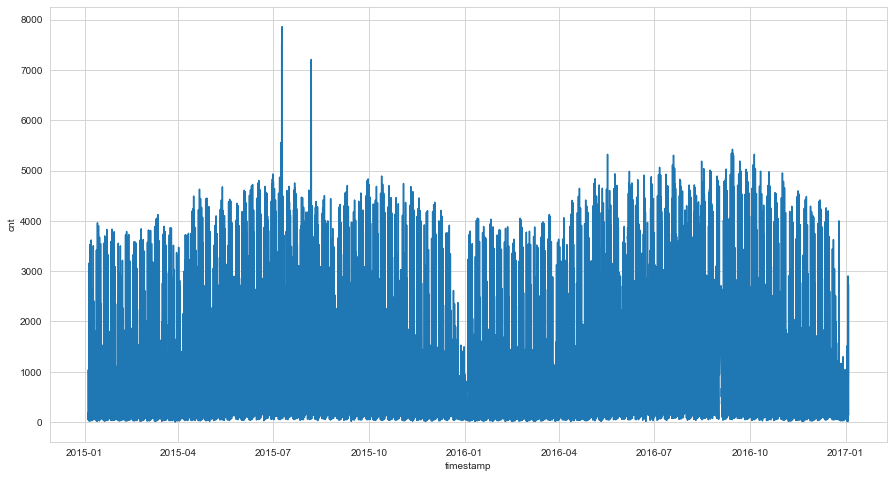

In [16]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.index,y=df.cnt)

***ii. Plot bike shares by months***

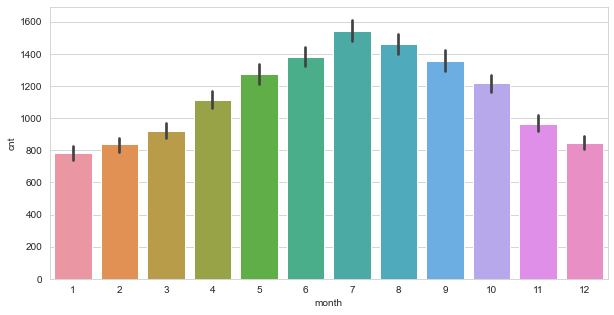

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x = "month", y = "cnt", data=df, ci=95);

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

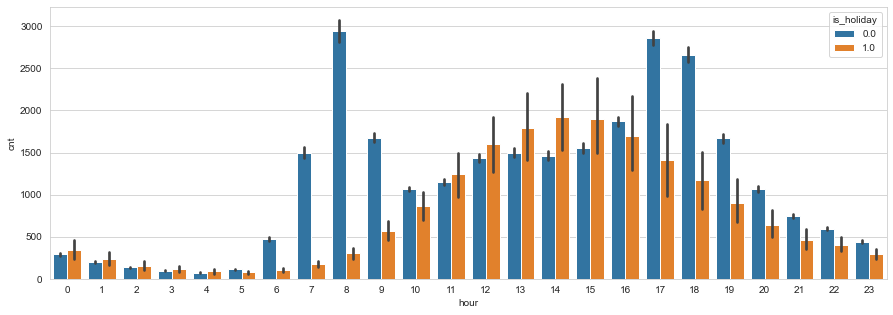

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x = "hour", y = "cnt", data=df,hue="is_holiday");

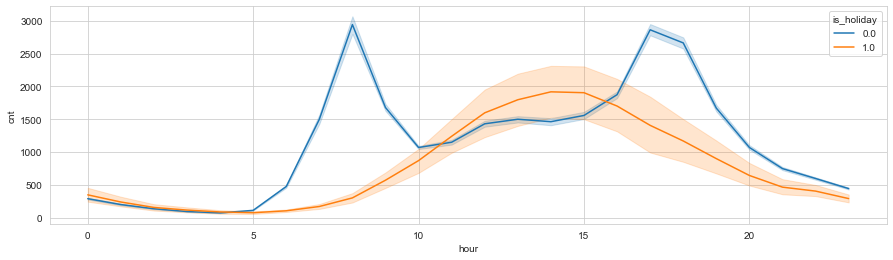

In [19]:
plt.figure(figsize=(15,4))
sns.lineplot(x = "hour", y = "cnt", data=df, hue = "is_holiday");

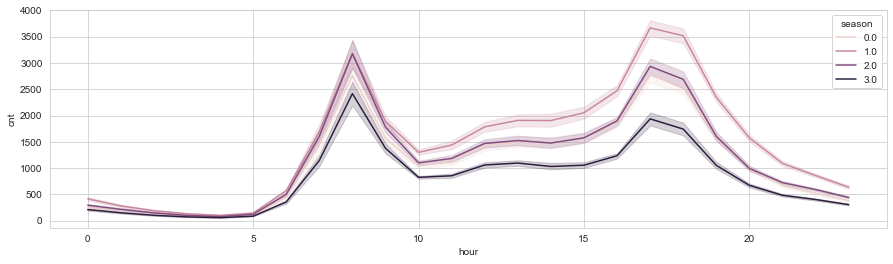

In [20]:
plt.figure(figsize=(15,4))
sns.lineplot(x = "hour", y = "cnt", data=df, hue = "season");

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

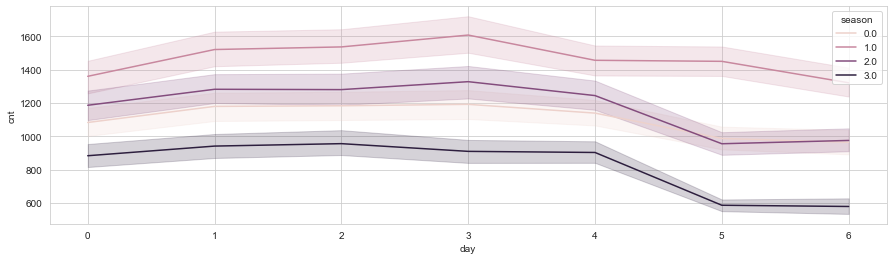

In [21]:
plt.figure(figsize=(15,4))
sns.lineplot(x = "day", y = "cnt", data=df, hue = "season");

***v. Plot the distribution of bike shares on holidays by seasons***

<AxesSubplot:xlabel='season', ylabel='cnt'>

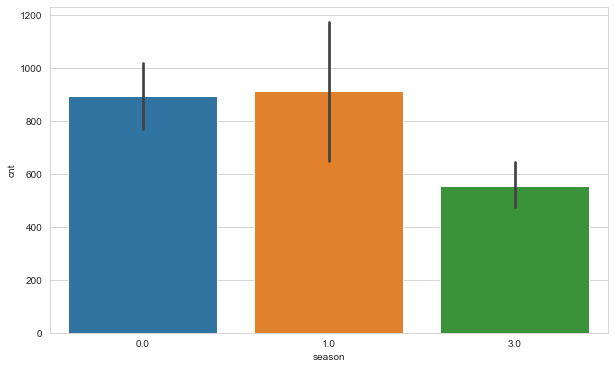

In [22]:
#df_isholiday = df[df["is_holiday"]==1]

sns.barplot(data=df[df["is_holiday"]==1], x="season",y="cnt")

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

<AxesSubplot:>

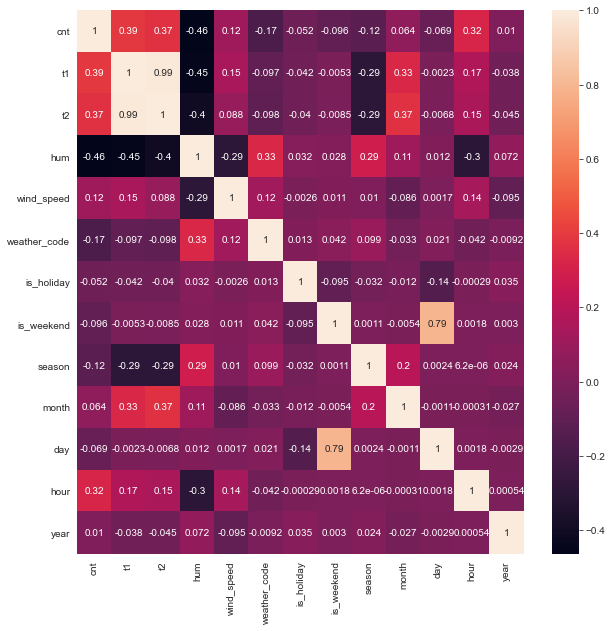

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

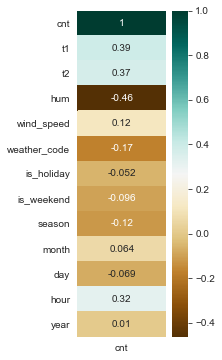

In [24]:
plt.figure(figsize=(2,6))

sns.heatmap(df.corr()[["cnt"]], cmap="BrBG", annot=True)

In [25]:
df.year.value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

<AxesSubplot:xlabel='timestamp'>

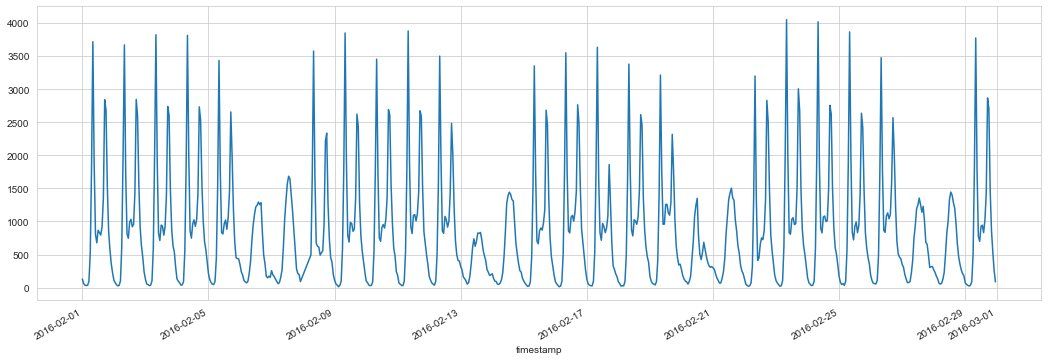

In [26]:
df[(df.year==2016)&(df.month==2)]["cnt"].plot(figsize=(18,6))

<AxesSubplot:xlabel='timestamp'>

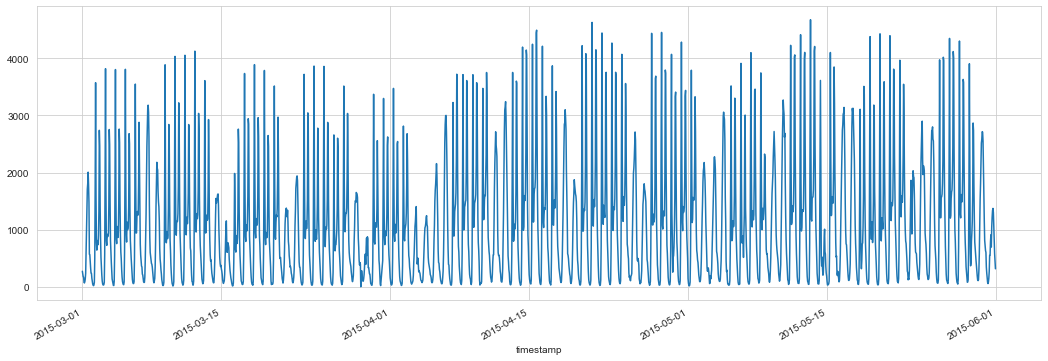

In [82]:
df[(df.year==2015)&(df.season==0)]["cnt"].plot(figsize=(18,6))

## 2. Data Pre-Processing


### Train - Test Split

Appropriately split the data for optimum training.

In [28]:
df1=df1.set_index("timestamp")

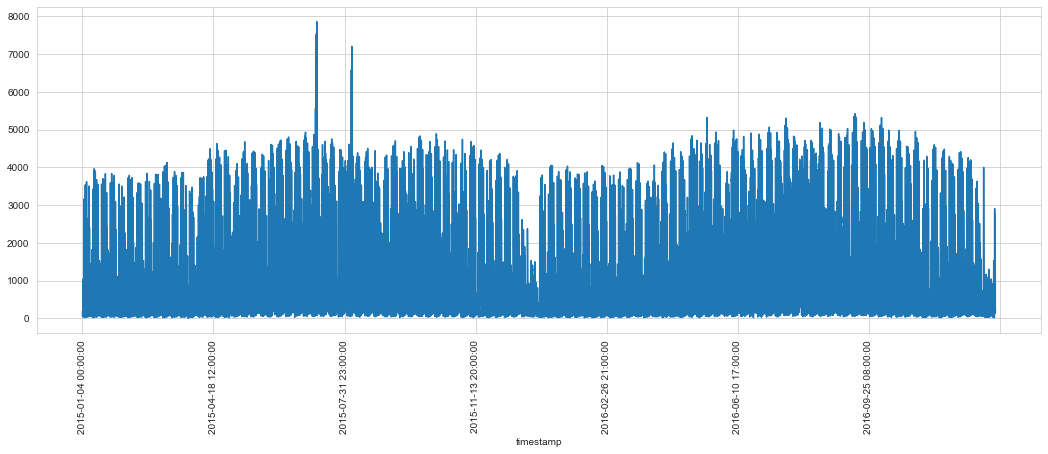

In [29]:
df1['cnt'].plot(figsize=(18,6))
plt.xticks(rotation=90);

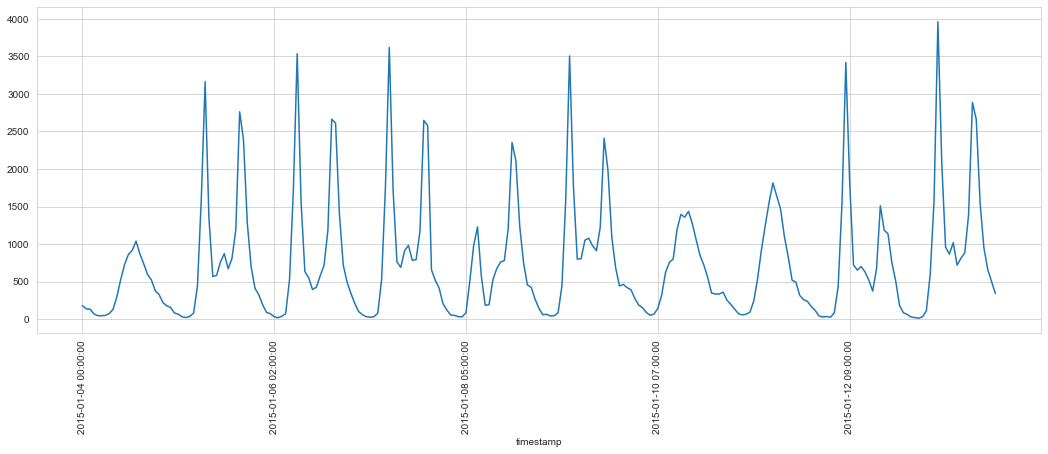

In [30]:
df1['cnt'].loc["2015-01-04 00:00:00" : "2015-01-13 23:50:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

In [31]:
df1.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [32]:
cat_columns=["weather_code","is_holiday","is_weekend","season"]

In [33]:
for i in cat_columns:
    df1[i]=df[i].astype("str")

In [34]:
df1["weather_code"].dtype

dtype('O')

In [35]:
len(df1)

17414

In [36]:
df1=pd.get_dummies(df1)

In [37]:
test_day=56## period week=7

In [38]:
test_ind=test_day*24

In [39]:
train = df1.iloc[:-test_ind]
test = df1.iloc[-test_ind:]

In [40]:
train.shape,test.shape

((16070, 5), (1344, 5))

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [43]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys) #x = np.asarray(x).astype('float32').

In [44]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(16046, 24, 5) (16046,)


---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






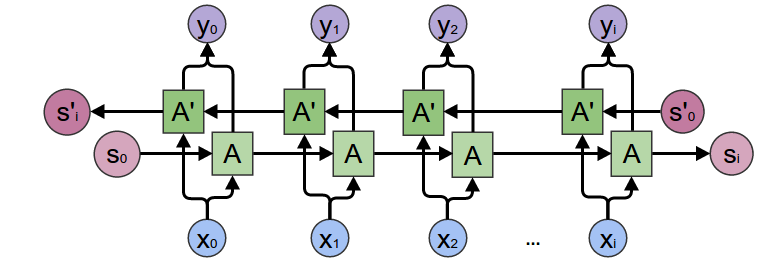

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

### Plot Train and Validation Losses

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]))))

model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [47]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

In [48]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=64, 
          validation_split=0.3,
          shuffle=False,
          callbacks=[early_stop])

Epoch 1/30
176/176 [==============================] - 20s 89ms/step - loss: 0.2571 - val_loss: 0.1610
Epoch 2/30
176/176 [==============================] - 16s 93ms/step - loss: 0.1353 - val_loss: 0.1299
Epoch 3/30
176/176 [==============================] - 14s 82ms/step - loss: 0.1055 - val_loss: 0.0989
Epoch 4/30
176/176 [==============================] - 15s 86ms/step - loss: 0.0759 - val_loss: 0.0767
Epoch 5/30
176/176 [==============================] - 16s 92ms/step - loss: 0.0589 - val_loss: 0.0638
Epoch 6/30
176/176 [==============================] - 16s 92ms/step - loss: 0.0504 - val_loss: 0.0596
Epoch 7/30
176/176 [==============================] - 16s 93ms/step - loss: 0.0452 - val_loss: 0.0575
Epoch 8/30
176/176 [==============================] - 15s 86ms/step - loss: 0.0419 - val_loss: 0.0547
Epoch 9/30
176/176 [==============================] - 17s 94ms/step - loss: 0.0367 - val_loss: 0.0482
Epoch 10/30
176/176 [==============================] - 16s 89ms/step - loss: 0.032

In [60]:
y_pred=model.predict(X_test)

---
---

## 4. Demand Predictions and Calculate Scores

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [63]:
eval_metrics(y_test,y_pred)

r2_score: 0.9668816053933864 
 mae: 0.06856851345934487 
 mse: 0.012199624677810623 
 rmse: 0.11045191115508424


### Inverse Transform

In [64]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [65]:
train.shape[0]

16070

In [66]:
test_index = df1.iloc[train.shape[0]:].iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index

In [67]:
pred_test

,test,prediction
timestamp,,
2016-11-09 23:00:00,318.000,335.923
2016-11-10 00:00:00,69.000,238.396
2016-11-10 01:00:00,63.000,-3.378
2016-11-10 02:00:00,44.000,64.270
2016-11-10 03:00:00,26.000,59.373
...,...,...
2017-01-03 19:00:00,1042.000,1159.385
2017-01-03 20:00:00,541.000,589.204
2017-01-03 21:00:00,337.000,341.876


<AxesSubplot:xlabel='timestamp'>

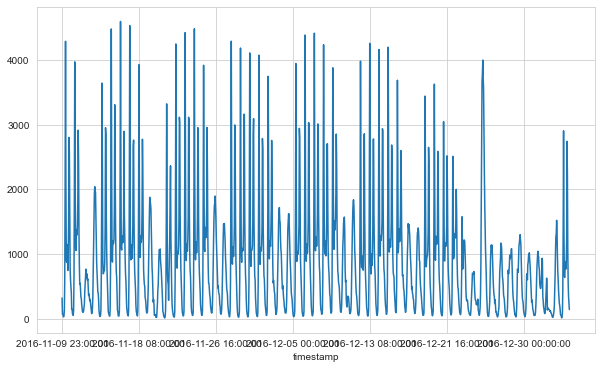

In [68]:
pred_test["test"].plot()

<AxesSubplot:xlabel='timestamp'>

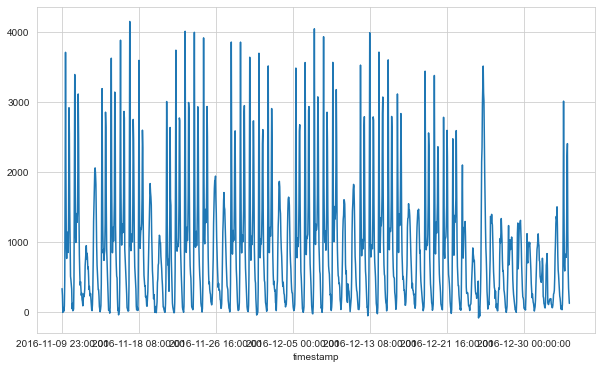

In [69]:
pred_test["prediction"].plot()

### Plot Prediction

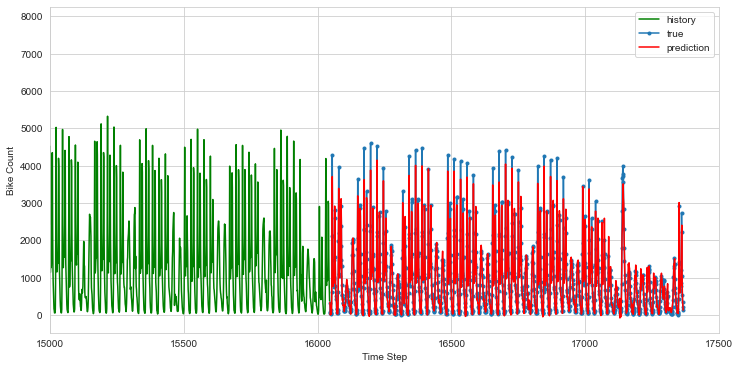

In [70]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.xlim(15000,17500)
plt.legend()
plt.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___